# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # cm = color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function
## $$f(x) = x^2 + x + 1$$

In [2]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

def f(x):
    return x**2 + x + 1

def df(x):
    return 2*x + 1

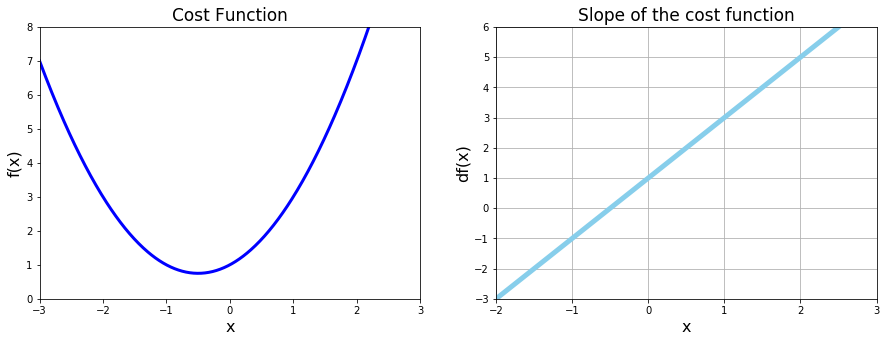

In [3]:
# Plot function and derivative side by side

# figsize = [width, height]
plt.figure(figsize=[15,5])

# Chart 1: Cost function
# subplot(row, col, index)
plt.subplot(1, 2, 1)

plt.xlim([-3,3])
plt.ylim(0,8)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent

In [4]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print("Number of iterations = ", n+1)
        break

print('Local Minimum occurs at ', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point is: ', f(new_x))

Number of iterations =  51
Local Minimum occurs at  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point is:  0.7500000015970362


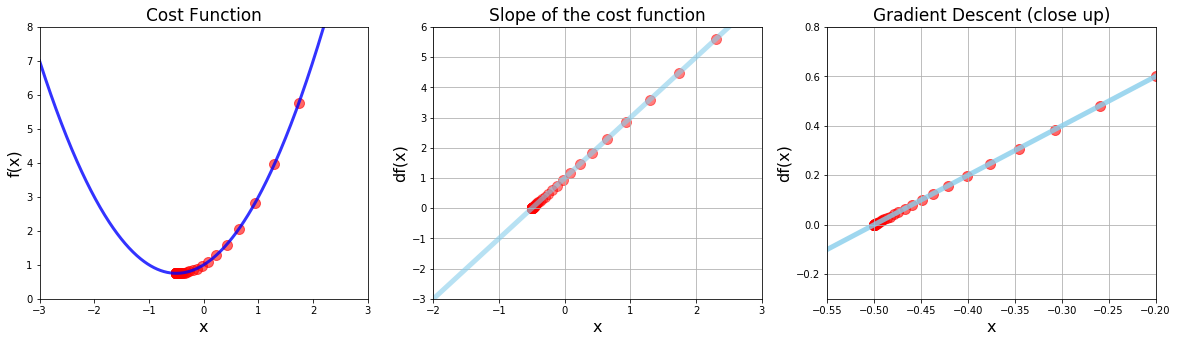

In [5]:
# Superimpose the gradient descent calculations on plot

# figsize = [width, height]
plt.figure(figsize=[20,5])

# Chart 1: Cost function
# subplot(row, col, index)
plt.subplot(1, 3, 1)

plt.xlim([-3,3])
plt.ylim(0,8)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# Chart 2: Derivative
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)

plt.show()

# Example 2 - Multiple minima vs Initial Guess and Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [6]:
# Make Some Data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

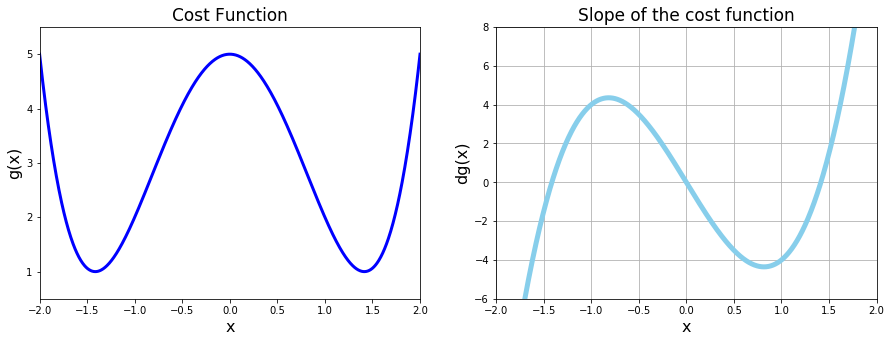

In [7]:
# Plot function and derivative side by side

# figsize = [width, height]
plt.figure(figsize=[15,5])

# Chart 1: Cost function
# subplot(row, col, index)
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [8]:
def gradient_descent(derivative_func, initial_guess, multiplier = 0.02, precision = 0.001, max_iter = 300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        if step_size < precision:
            break
    
    return new_x, x_list, slope_list

In [9]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)

print('Local minimum occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local minimum occurs at:  1.4122375085019094
Number of steps:  23


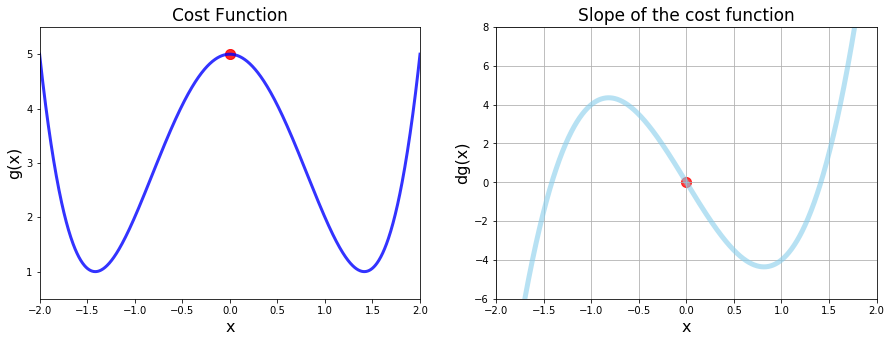

In [10]:
# Calling grdient_descent function 
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0)

# Plot function, derivative and scatter plot side by side

# figsize = [width, height]
plt.figure(figsize=[15,5])

# Chart 1: Cost function
# subplot(row, col, index)
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence and Overflow
## $$h(x) = x^5 - 2x^4 + 2$$

In [11]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

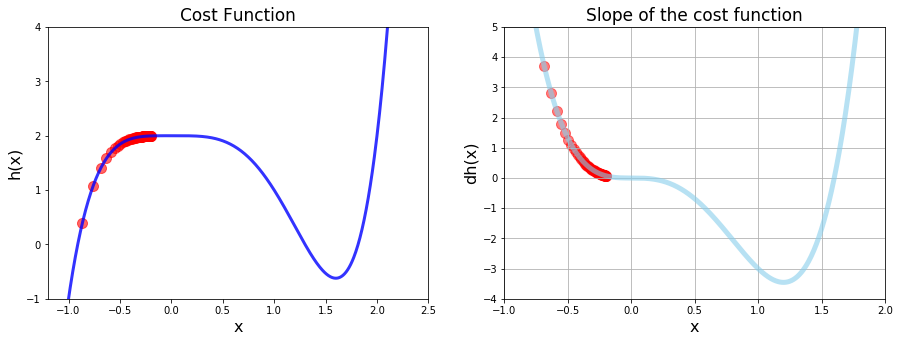

Local minimum occurs at:  -2071072.4470816324
Cost at the minimum is:  -3.810455326061589e+31
Number of steps:  71


In [12]:
# Calling grdient_descent function 
local_min, list_x, deriv_list = gradient_descent(derivative_func = dh, initial_guess = -0.2, max_iter = 70)

# Plot function, derivative and scatter plot side by side

# figsize = [width, height]
plt.figure(figsize=[15,5])

# Chart 1: Cost function
# subplot(row, col, index)
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local minimum occurs at: ', local_min)
print('Cost at the minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [13]:
import sys

sys.float_info.max

1.7976931348623157e+308

## The Learning Rate

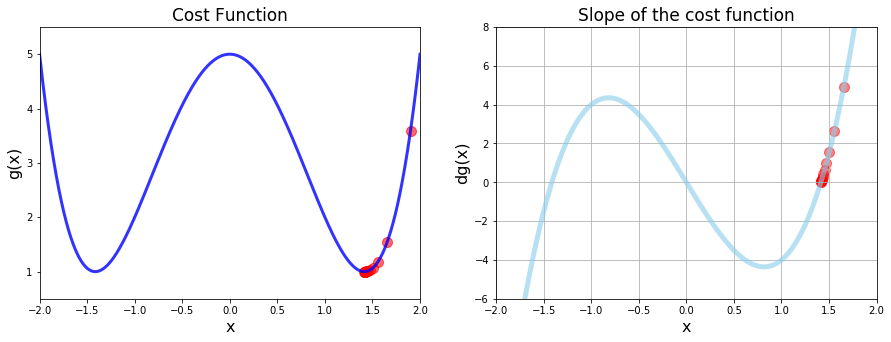

Number of steps:  14


In [14]:
# Calling grdient_descent function 
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 1.9, multiplier = 0.02, max_iter=500)

# Plot function, derivative and scatter plot side by side

# figsize = [width, height]
plt.figure(figsize=[15,5])

# Chart 1: Cost function
# subplot(row, col, index)
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps: ', len(list_x))

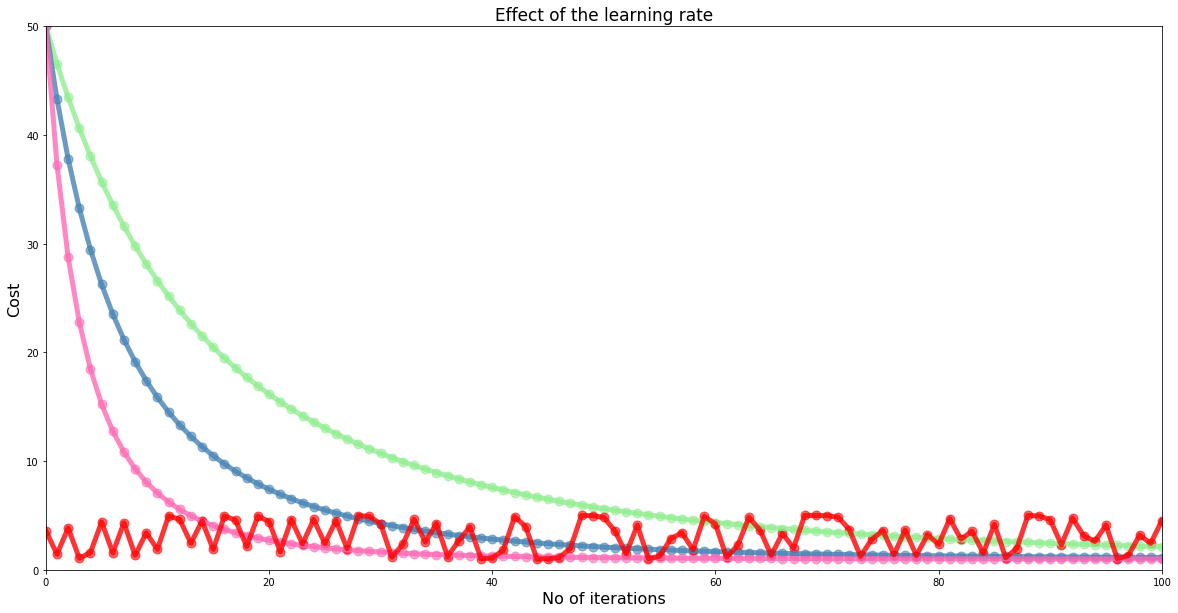

In [15]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier = 0.0005, precision = 0.0001, max_iter = n)
mid_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier = 0.001, precision = 0.0001, max_iter = n)
high_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier = 0.002, precision = 0.0001, max_iter = n)

# Experiment
insane_gamma = gradient_descent(derivative_func = dg, initial_guess = 1.9, multiplier = 0.25, precision = 0.0001, max_iter = n)

# Plotting reduction in cost for each iteration
plt.figure(figsize=[20,10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('No of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
insane_values = np.array(insane_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = np.arange(0, n+1, 1) # or list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80, alpha=0.6)

# Plotting mid learnign rate
plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=80, alpha=0.6)

# Plotting high learning rate
plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=80, alpha=0.6)

# Plotting insane learning rate
plt.plot(iteration_list, g(insane_values), color='red', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(insane_values), color='red', s=80, alpha=0.6)

plt.show()

# Example 4 - Data Viz with 3D Charts
## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [16]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [17]:
# Make our x and y data
x_4 = np.linspace(-2, 2, 200)
y_4 = np.linspace(-2, 2, 200)

print('Shape of X array: ', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array:  (200,)
Array after meshgrid:  (200, 200)


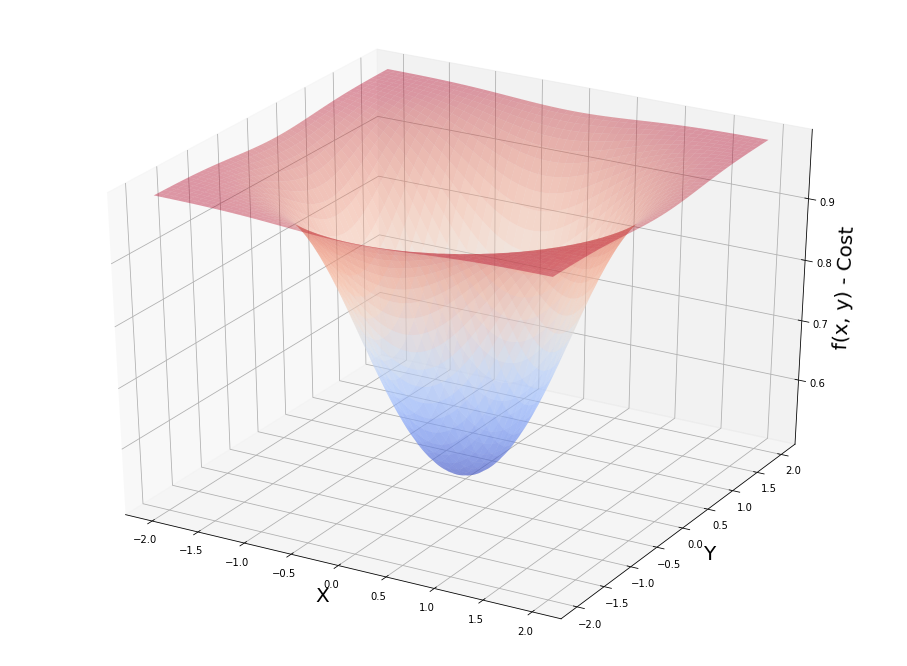

In [18]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

## Partial Derivatives and Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot {3^{-x^2 - y^2}}}{ \left( 3^{-x^2 - y^2} + 1 \right) ^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

In [19]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), a))
print('Value of f(x, y) at x=1.8, y=1.0 is: ', f(a, b).evalf(subs={a:1.8, b:1.0}))
print('Value of partial derivative wrt x is: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8, y=1.0 is:  0.990604794032582
Value of partial derivative wrt x is:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [20]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is ', f(params[0], params[1]))

Values in gradient array  [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of:  0.000793898510134722
Minimum occurs at y value of:  0.000441054727852623
The cost is  0.500000226534985


In [21]:
# Partial Derivative functions example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [22]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is ', f(params[0], params[1]))

Values in gradient array  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is  0.5


## Gradient 3D Gradient Descent & Adv Numpy Arrays

In [23]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)

print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)

# Results
print('Values in gradient array ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is ', f(params[0], params[1]))

(1, 2)
Values in gradient array  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is  0.5


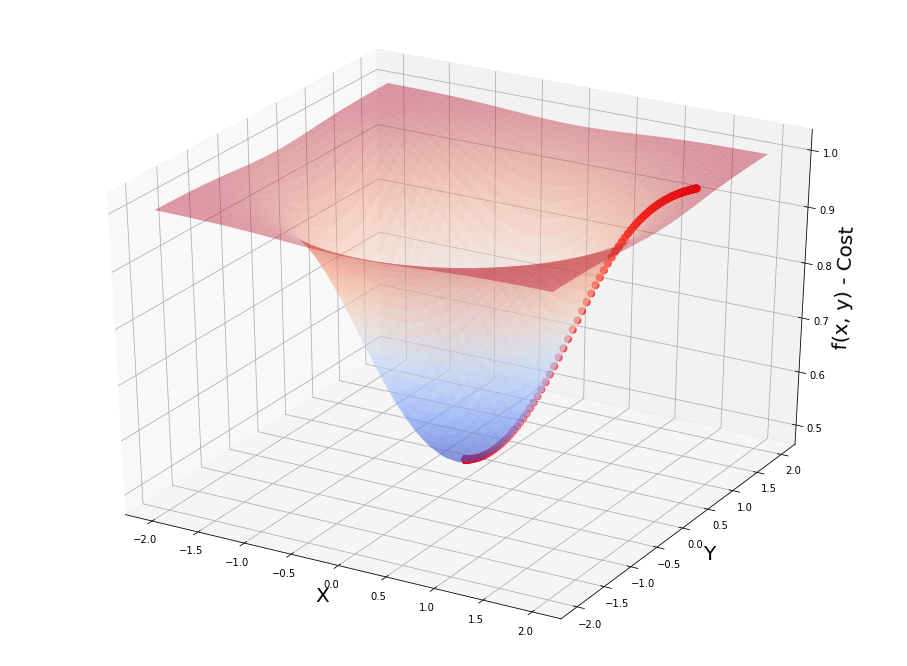

In [24]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

In [25]:
# Advanced Numpy Array Practice

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['QuestLove', 'Drums']])
print(hs_band.shape)

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots, end='\n\n')
print('Printing Nicknames...', the_roots[:, 0])
print('Printing Roles...', the_roots[:, 1])

(1, 2)
(2, 2)
[['Black Thought' 'MC']
 ['QuestLove' 'Drums']
 ['Captain' 'Guitar']]

Printing Nicknames... ['Black Thought' 'QuestLove' 'Captain']
Printing Roles... ['MC' 'Drums' 'Guitar']


# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [26]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).reshape(7, 1)

In [27]:
# Quick Linear Regression
regr = LinearRegression()
regr.fit(x_5, y_5)

print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


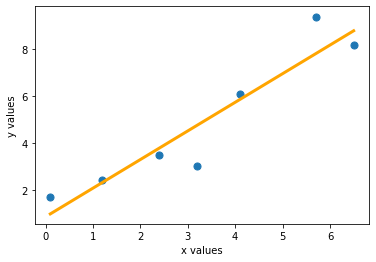

In [28]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [29]:
# y_hat = theta0 + theta1 * x
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5
print('Est values y_hat are:\n', y_hat)

Est values y_hat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


In [30]:
def mse(y, y_hat):
    # mse_calc = 1/7 * sum((y - y_hat)**2)
    # mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [31]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.9479655759794577
MSE regression is 0.9479655759794577


## 3D Plot for the MSE Cost Function

## Make data for thetas

In [32]:
nr_thetas = 200
th_0 = np.linspace(-1, 3, nr_thetas)
th_1 = np.linspace(-1, 3, nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

## Calc MSE using nested for loops

In [33]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
print('Shape:', plot_cost.shape)

Shape: (200, 200)


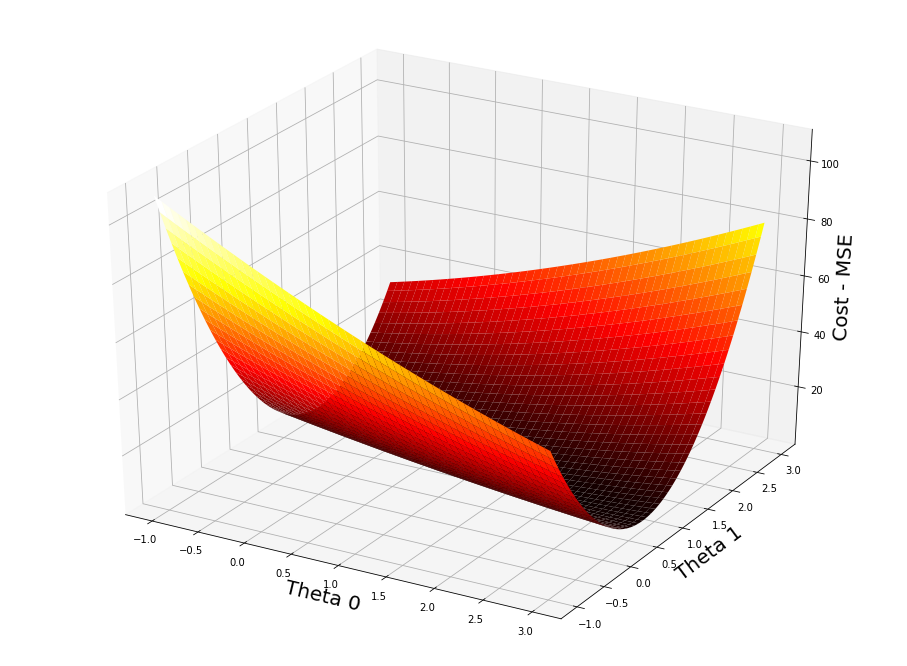

In [34]:
# Plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [35]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i, j):', ij_min)
print(f'Min MSE for Theta 0 at plot_t0[{ij_min[0]}][{ij_min[1]}]', plot_t0[ij_min[0]][ij_min[1]])
print(f'Min MSE for Theta 1 at plot_t1[{ij_min[0]}][{ij_min[1]}]', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.9483826526747164
Min occurs at (i, j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} -\theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} -\theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [36]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1] * x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1] * x) * x)
    # return np.array([theta0_slope[0], theta1_slope[0]])
    # return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [37]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])
iterations = 1000

# Collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)

for i in range(iterations):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to out numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(mse_vals, mse(y_5, thetas[0] + thetas[1] * x_5))

#Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1] * x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


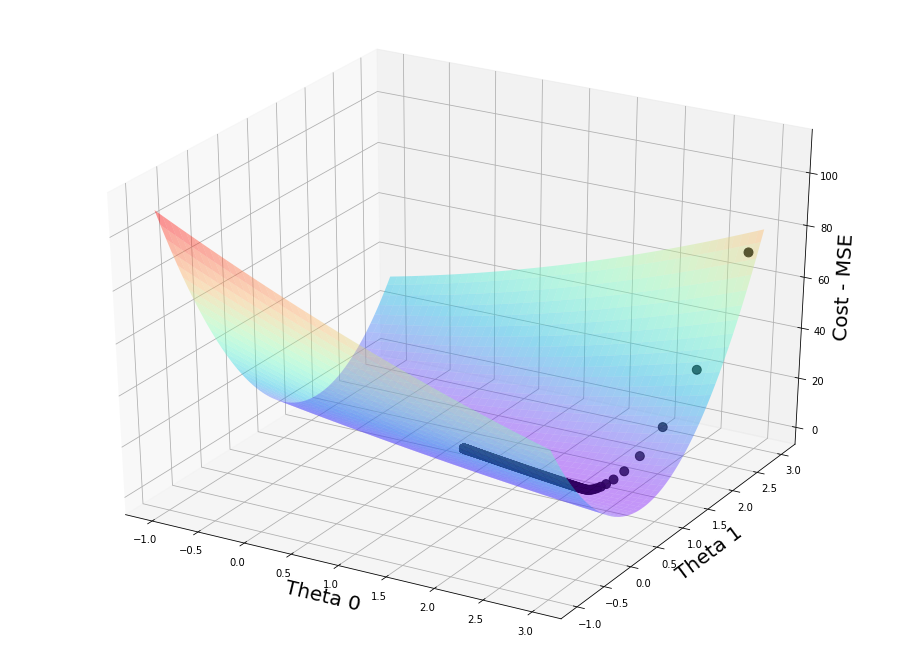

In [38]:
# Plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()